# Predict Bike Sharing Demand with AutoGluon Template

## Project: Predict Bike Sharing Demand with AutoGluon
This notebook is a template with each step that you need to complete for the project.

Please fill in your code where there are explicit `?` markers in the notebook. You are welcome to add more cells and code as you see fit.

Once you have completed all the code implementations, please export your notebook as a HTML file so the reviews can view your code. Make sure you have all outputs correctly outputted.

`File-> Export Notebook As... -> Export Notebook as HTML`

There is a writeup to complete as well after all code implememtation is done. Please answer all questions and attach the necessary tables and charts. You can complete the writeup in either markdown or PDF.

Completing the code template and writeup template will cover all of the rubric points for this project.

The rubric contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this notebook and also discuss the results in the writeup file.

## Step 1: Create an account with Kaggle

### Create Kaggle Account and download API key
Below is example of steps to get the API username and key. Each student will have their own username and key.

1. Open account settings.
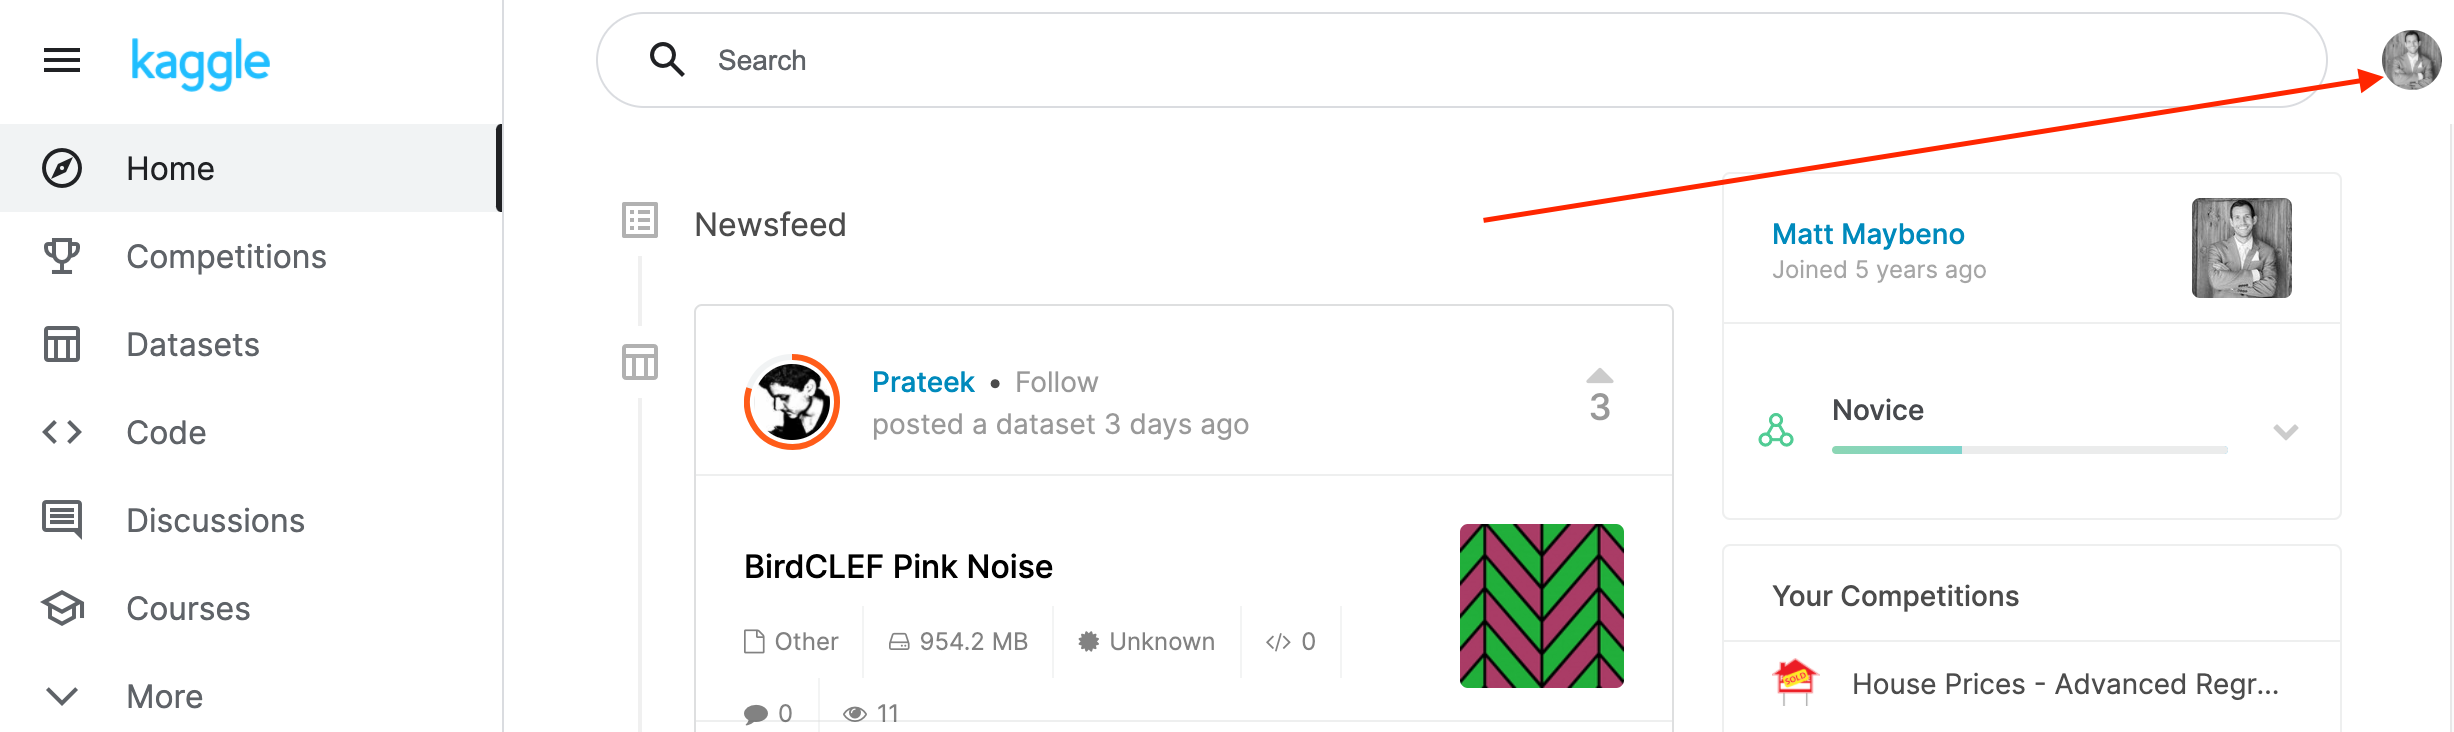
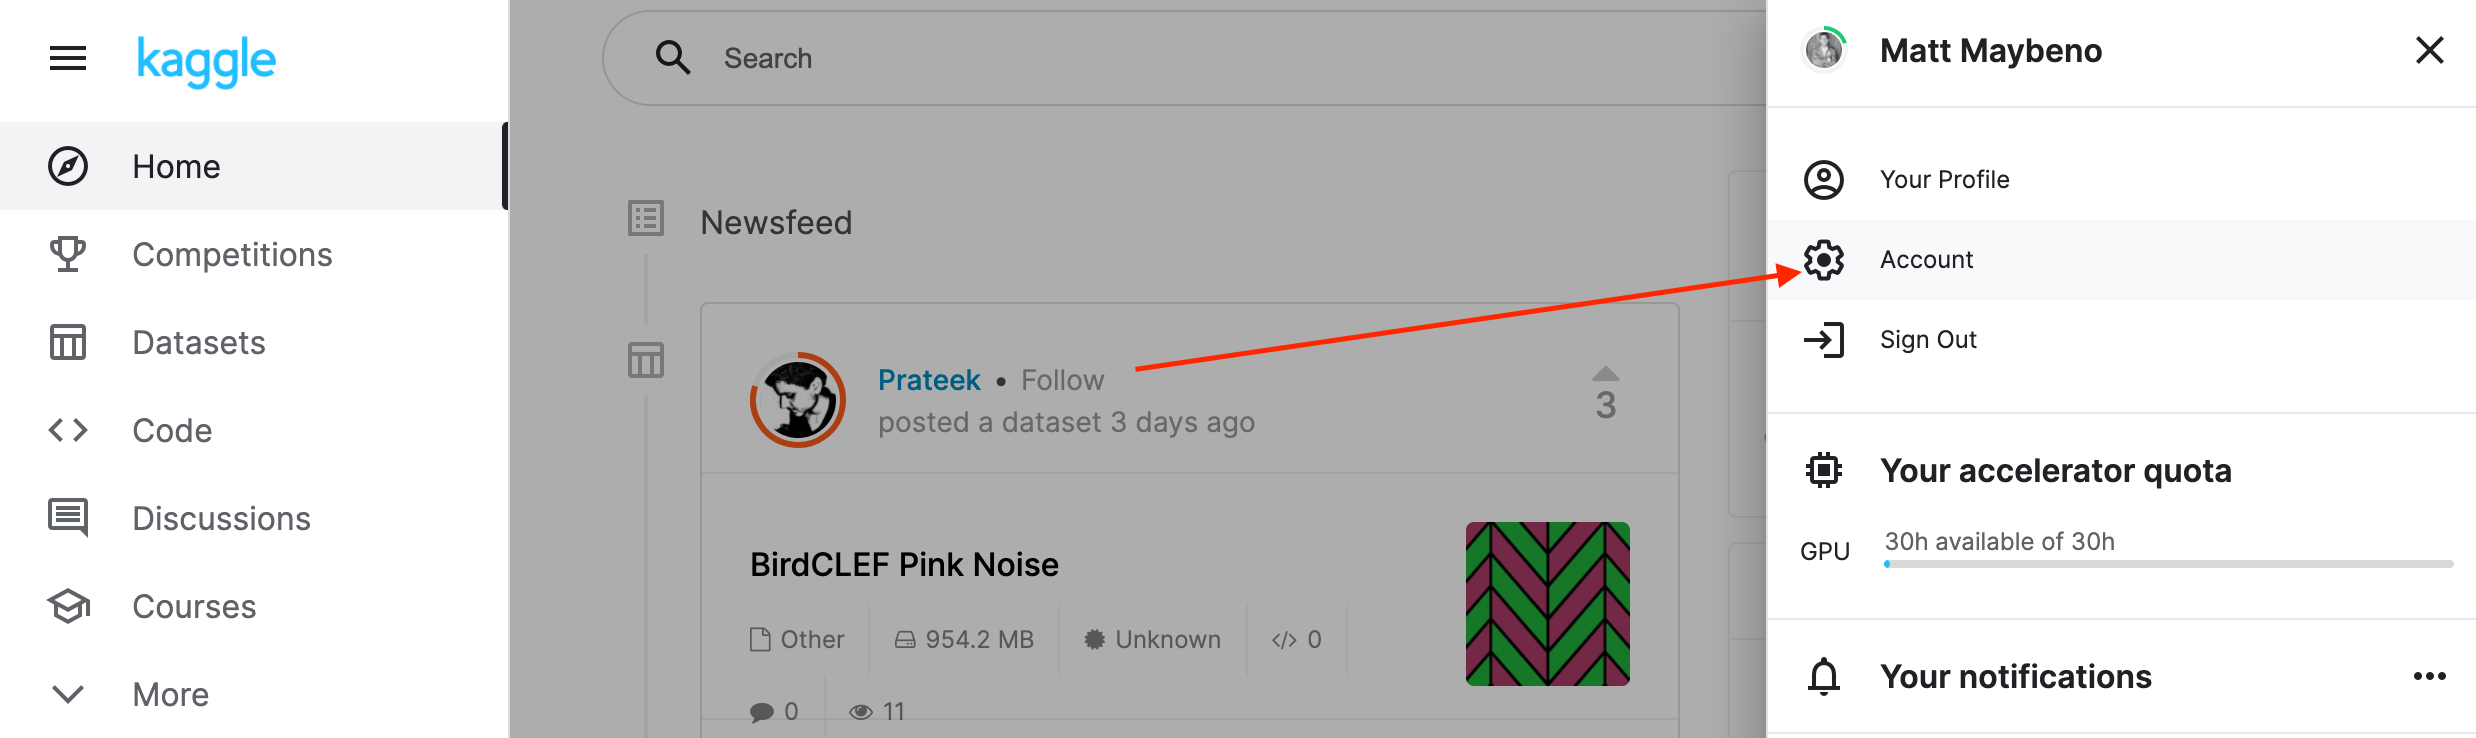
2. Scroll down to API and click Create New API Token.
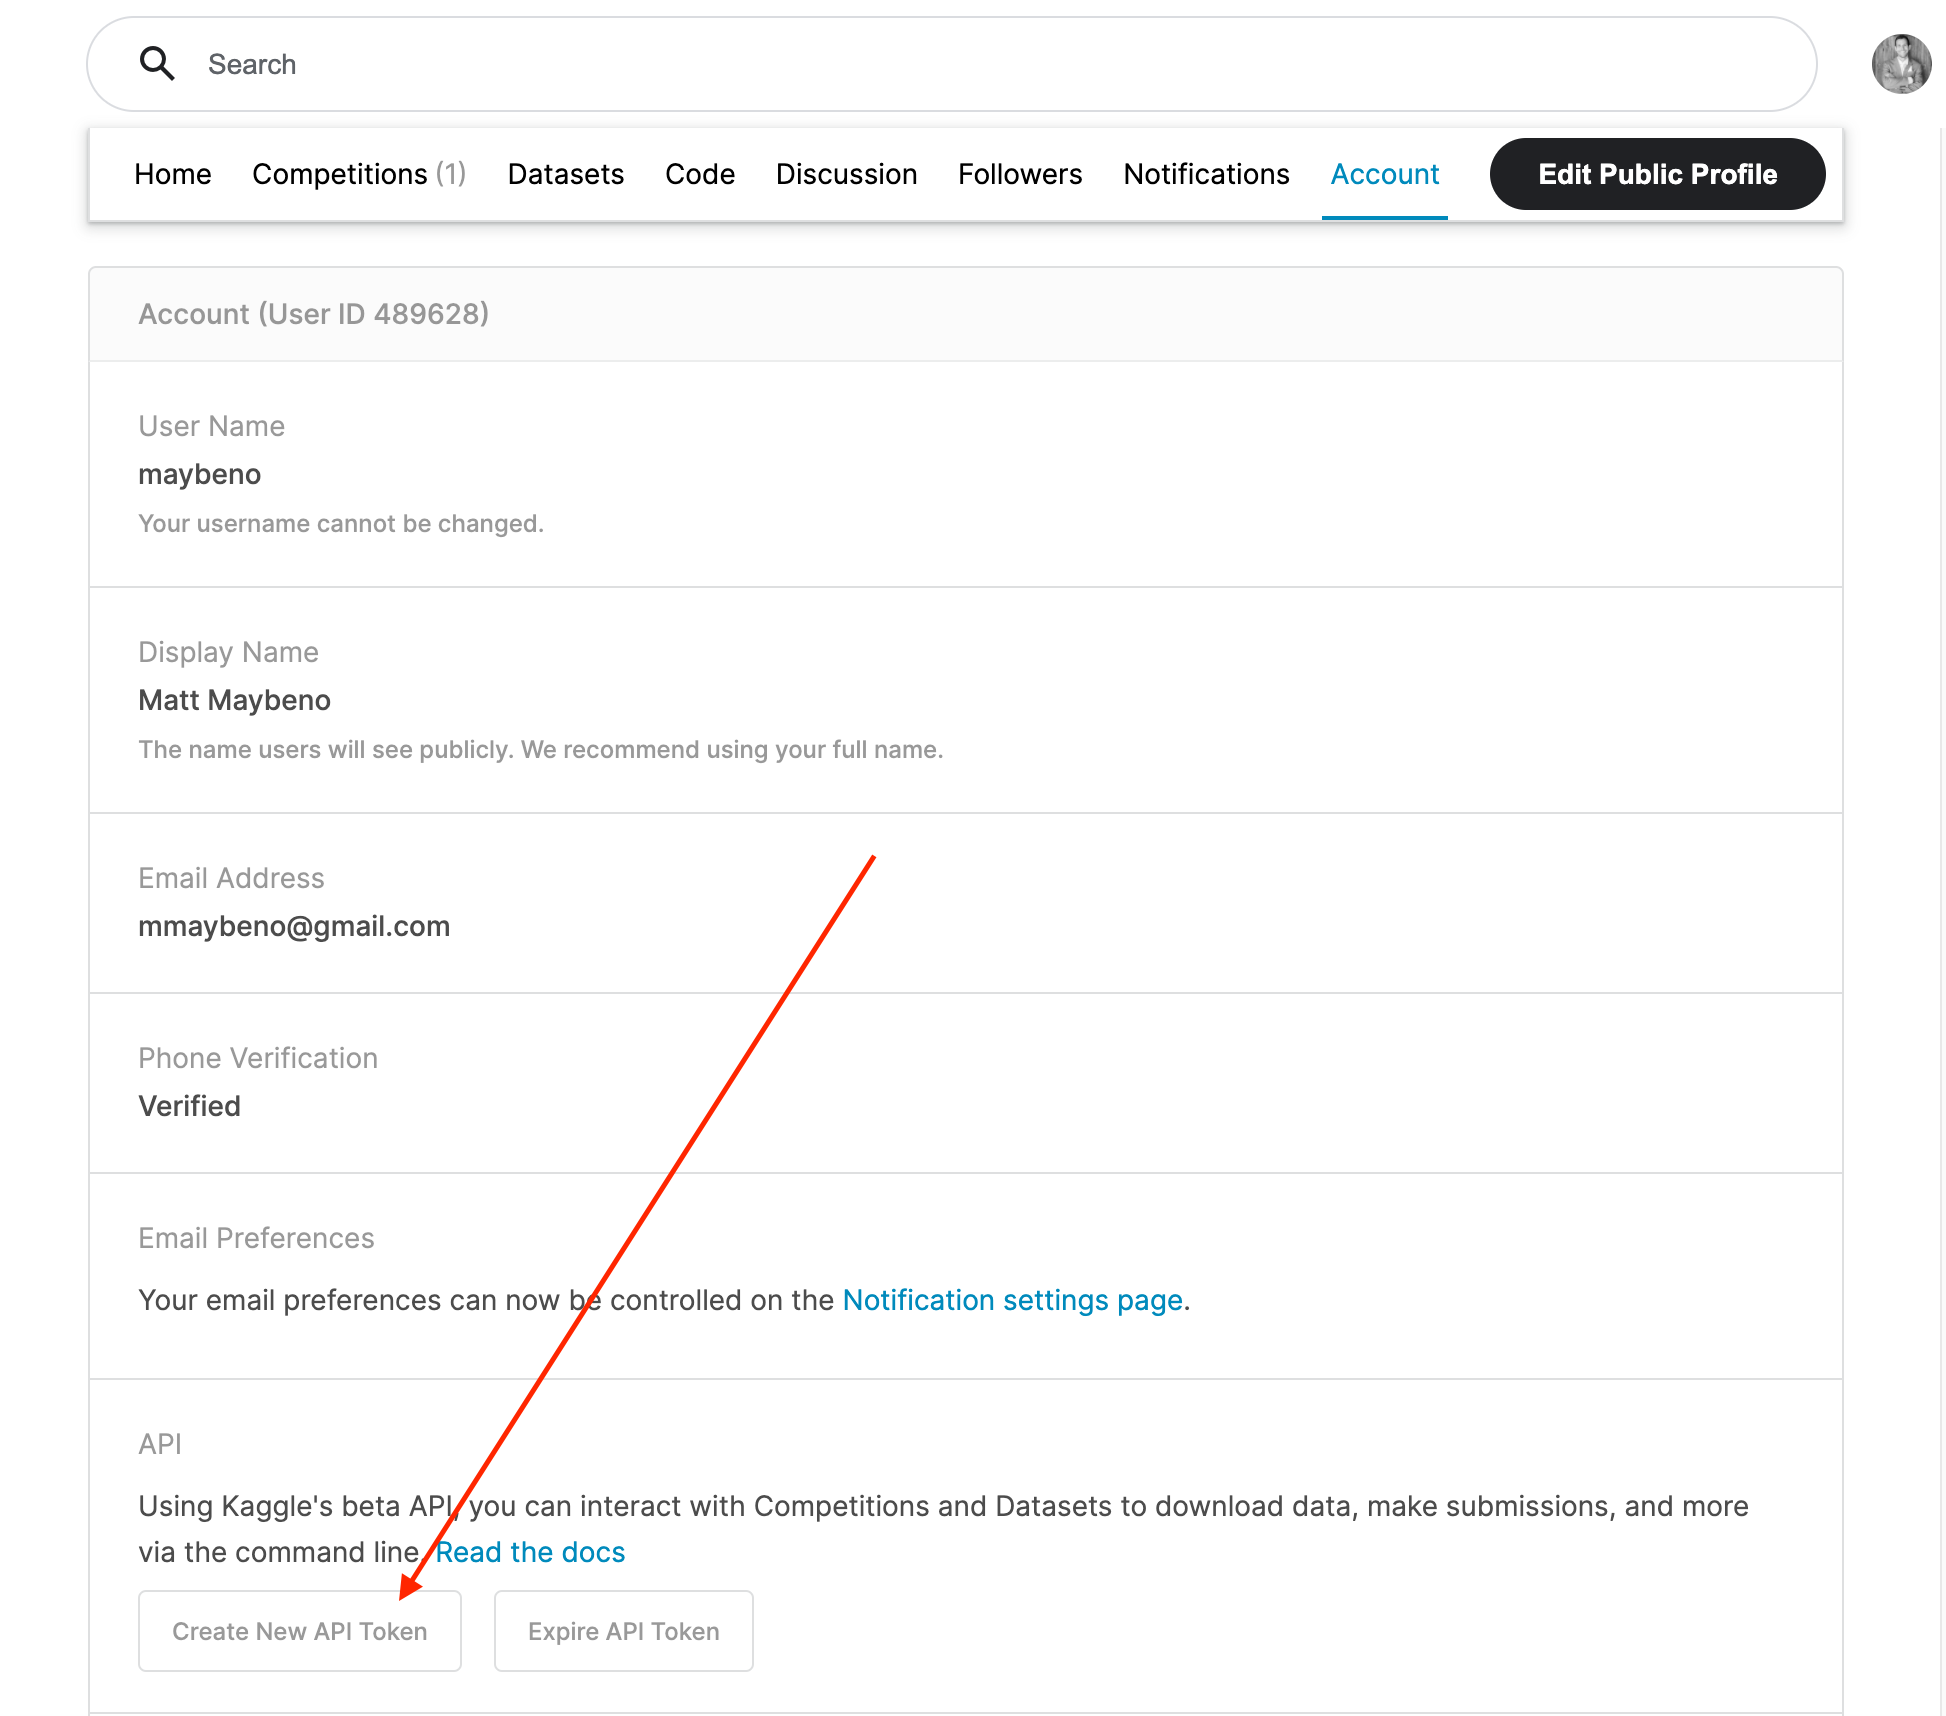
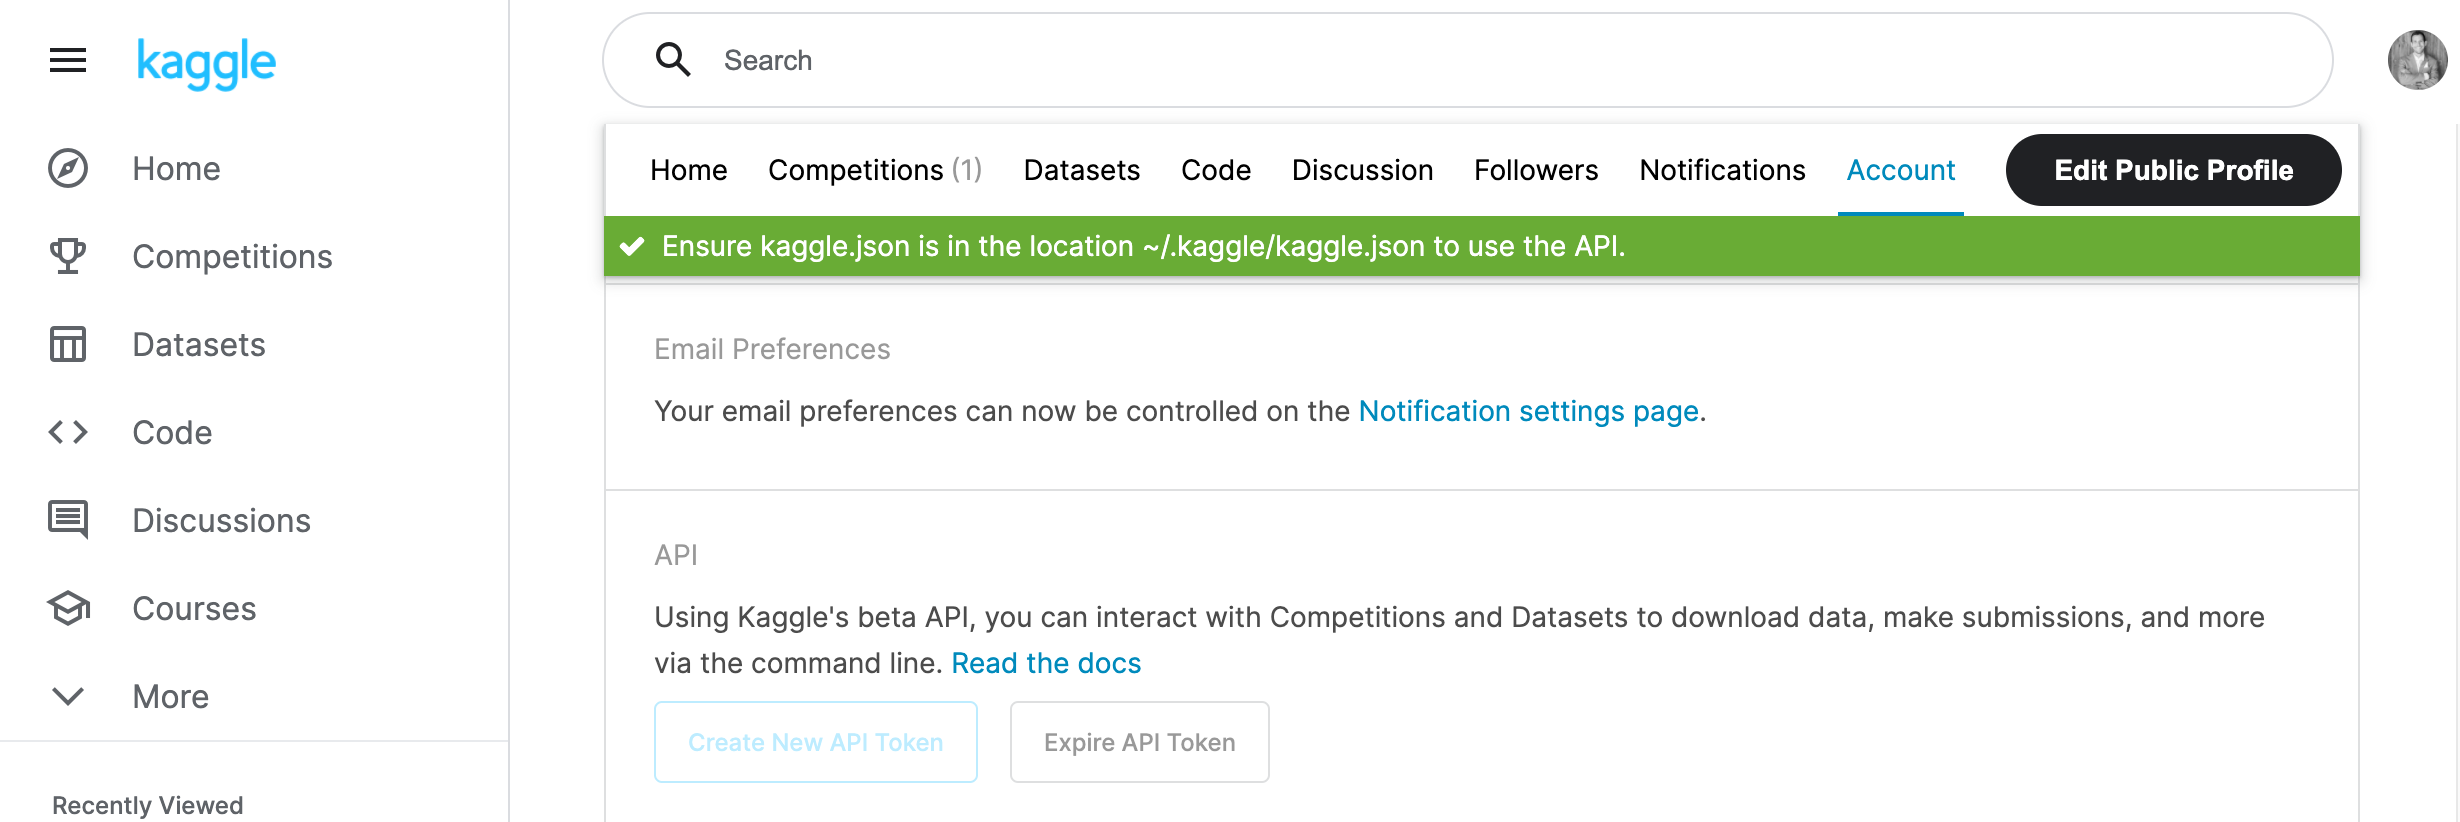
3. Open up `kaggle.json` and use the username and key.
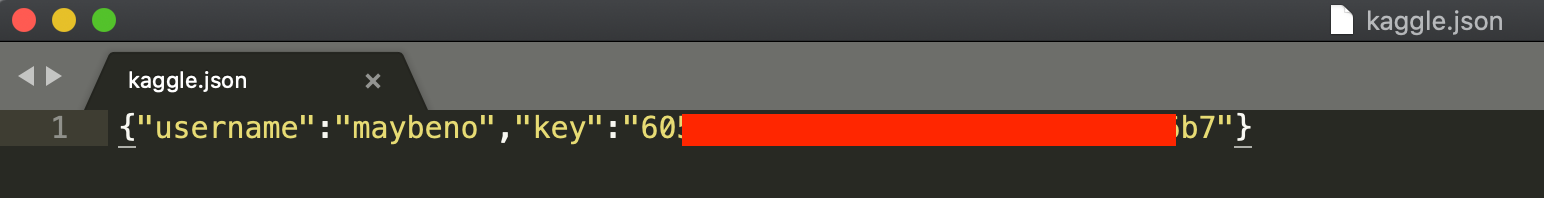

## Step 2: Download the Kaggle dataset using the kaggle python library

### Open up Sagemaker Studio and use starter template

1. Notebook should be using a `ml.t3.medium` instance (2 vCPU + 4 GiB)
2. Notebook should be using kernal: `Python 3 (MXNet 1.8 Python 3.7 CPU Optimized)`

### Install packages

In [2]:
!pip install -U pip
!pip install -U setuptools wheel
!pip install -U "mxnet<2.0.0" bokeh==2.0.1
!pip install autogluon --no-cache-dir
# Without --no-cache-dir, smaller aws instances may have trouble installing

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 24.4 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 25.7 MB/s eta 0:00:00:00:0100:01
  Created wheel for bokeh: filename=bokeh-2.0.1-py3-none-any.whl size=9080016 sha256=ba027c9a4695019217adbfd4e1b64ca04f4a69b303e8ae2bb0efa71a8d4d282d
  Stored in directory: /root/.cache/pip/wheels/be/b4/d8/7ce778fd6e637bea03a561223a77ba6649aff8168e3c613754
Successfully built bokeh
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.4.1
    Uninstalling bokeh-3.4.1:
      Successfully uninstalled bokeh-3.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
panel 1.4.1 requires bokeh<3.5.0,>=3.4.0, but you have bokeh 2.0.1 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 244.9 MB/s eta 0:00:00
    

### Setup Kaggle API Key

In [3]:
# create the .kaggle directory and an empty kaggle.json file
!mkdir -p /root/.kaggle
!touch /root/.kaggle/kaggle.json
!chmod 600 /root/.kaggle/kaggle.json

In [6]:
# Fill in your user name and key from creating the kaggle account and API token file
import json
kaggle_username = "nadeemahmedansari14"
kaggle_key = "399e13d8965df28d21b7e64ee48c938d"

# Save API token the kaggle.json file
with open("/root/.kaggle/kaggle.json", "w") as f:
    f.write(json.dumps({"username": kaggle_username, "key": kaggle_key}))

### Download and explore dataset

### Go to the bike sharing demand competition and agree to the terms
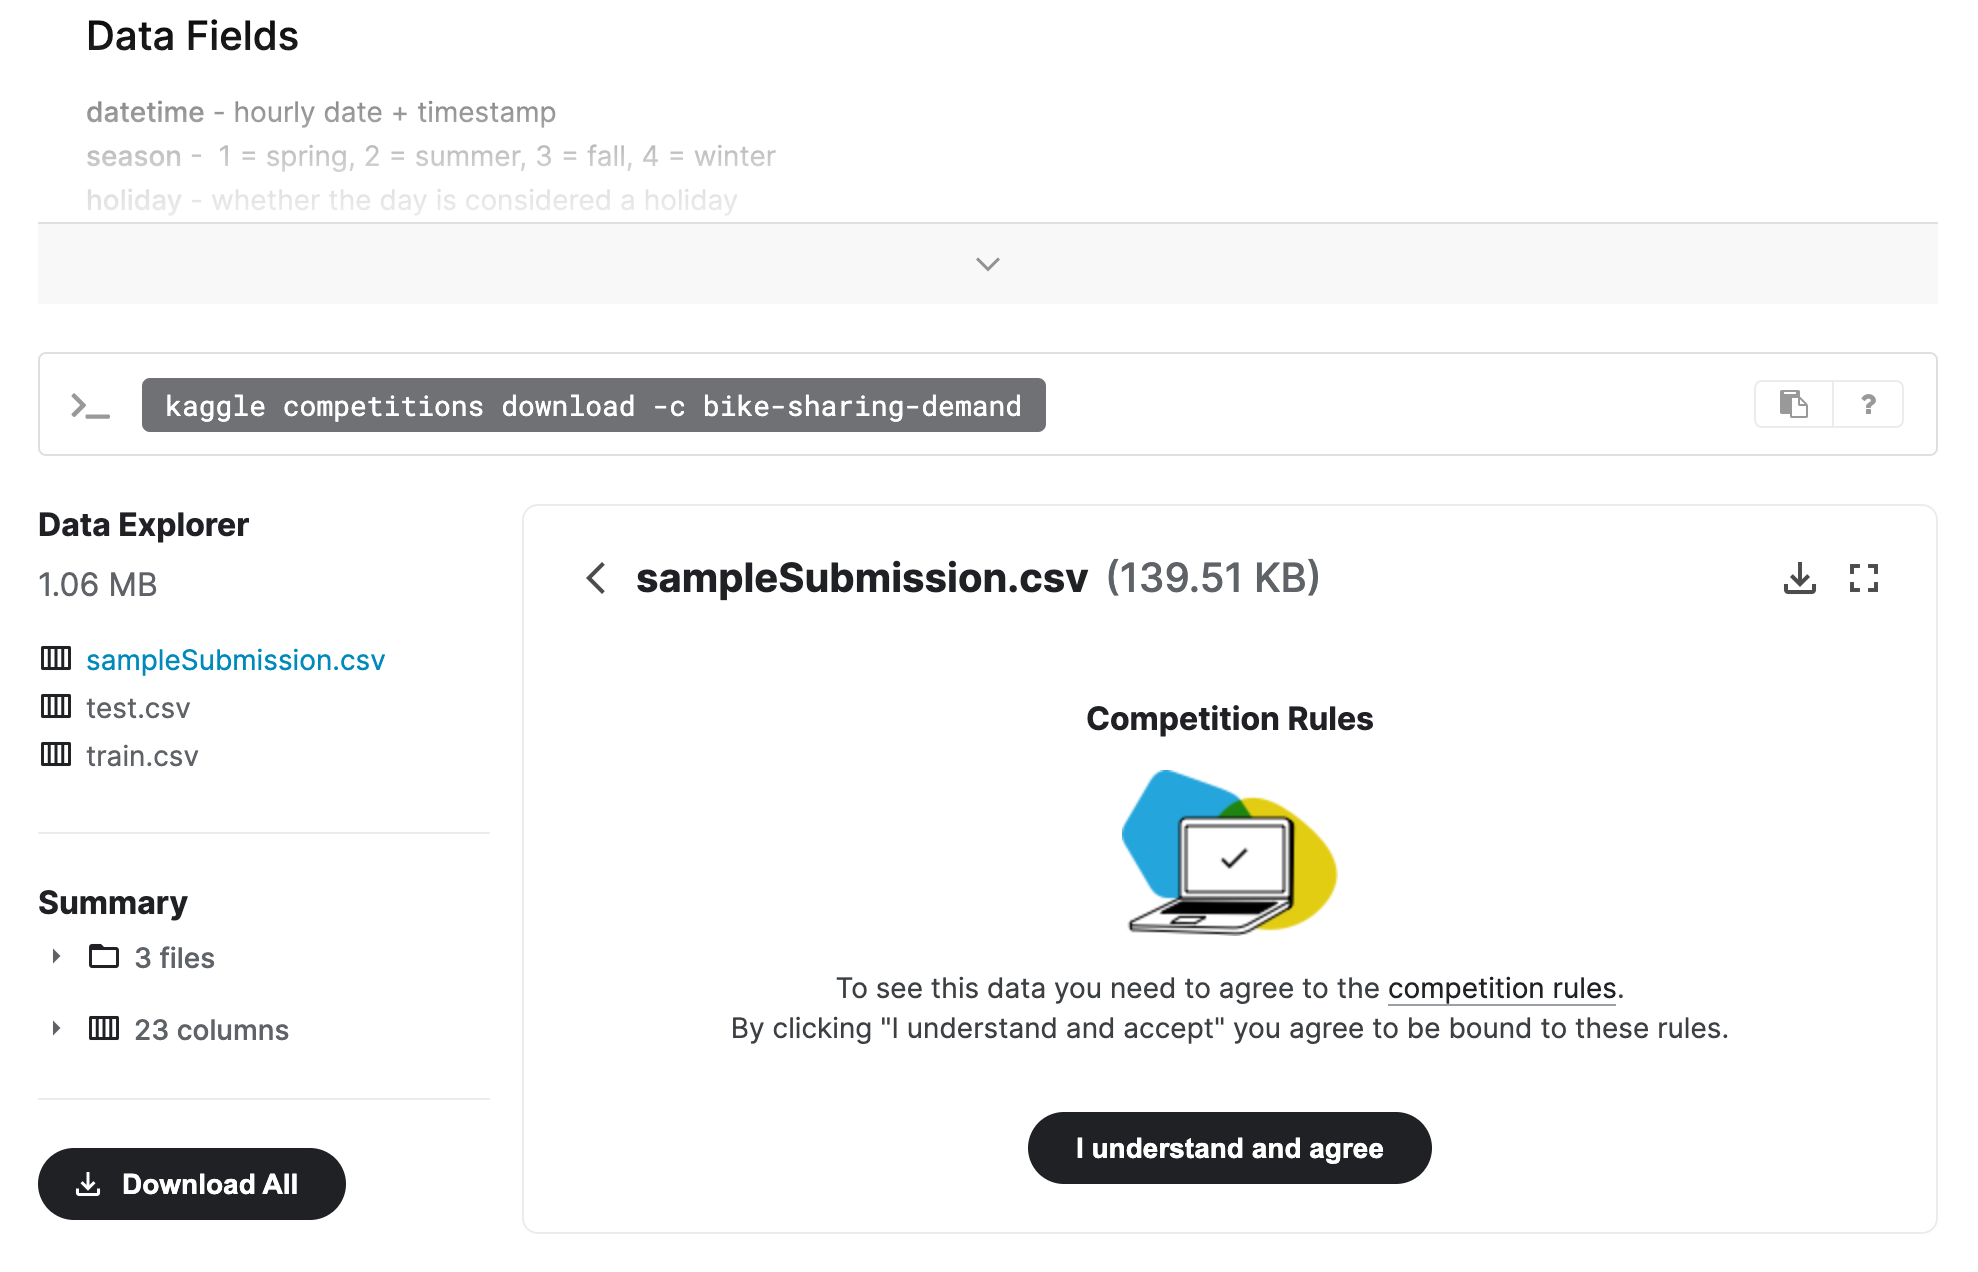

In [15]:
# Download the dataset, it will be in a .zip file so you'll need to unzip it as well.
!kaggle competitions download -c bike-sharing-demand

# If you already downloaded it you can use the -o command to overwrite the file
!unzip -o bike-sharing-demand.zip

  0%|                                                | 0.00/189k [00:00<?, ?B/s]
100%|████████████████████████████████████████| 189k/189k [00:00<00:00, 4.77MB/s]
Archive:  bike-sharing-demand.zip
  inflating: sampleSubmission.csv    
  inflating: test.csv                
  inflating: train.csv               


In [16]:
import pandas as pd
from autogluon.tabular import TabularPredictor

In [17]:
# Create the train dataset in pandas by reading the csv
# Set the parsing of the datetime column so you can use some of the `dt` features in pandas later
train = pd.read_csv('train.csv', parse_dates=['datetime'])
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [19]:
# Simple output of the train dataset to view some of the min/max/varition of the dataset features.
train.describe()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
count,10886,10886.000000,10886.000000,10886.000000,10886.000000,10886.00000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000,10886.000000
mean,2011-12-27 05:56:22.399411968,2.506614,0.028569,0.680875,1.418427,20.23086,23.655084,61.886460,12.799395,36.021955,155.552177,191.574132
min,2011-01-01 00:00:00,1.000000,0.000000,0.000000,1.000000,0.82000,0.760000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2011-07-02 07:15:00,2.000000,0.000000,0.000000,1.000000,13.94000,16.665000,47.000000,7.001500,4.000000,36.000000,42.000000
50%,2012-01-01 20:30:00,3.000000,0.000000,1.000000,1.000000,20.50000,24.240000,62.000000,12.998000,17.000000,118.000000,145.000000
75%,2012-07-01 12:45:00,4.000000,0.000000,1.000000,2.000000,26.24000,31.060000,77.000000,16.997900,49.000000,222.000000,284.000000
max,2012-12-19 23:00:00,4.000000,1.000000,1.000000,4.000000,41.00000,45.455000,100.000000,56.996900,367.000000,886.000000,977.000000
std,NaN,1.116174,0.166599,0.466159,0.633839,7.79159,8.474601,19.245033,8.164537,49.960477,151.039033,181.144454


In [21]:
# Create the test pandas dataframe in pandas by reading the csv, remember to parse the datetime!
test = pd.read_csv('test.csv', parse_dates=['datetime'])
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014


In [22]:
# Same thing as train and test dataset
submission = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission.head()

,datetime,count
0,2011-01-20 00:00:00,0
1,2011-01-20 01:00:00,0
2,2011-01-20 02:00:00,0
3,2011-01-20 03:00:00,0
4,2011-01-20 04:00:00,0


## Step 3: Train a model using AutoGluon’s Tabular Prediction

Requirements:
* We are prediting `count`, so it is the label we are setting.
* Ignore `casual` and `registered` columns as they are also not present in the test dataset. 
* Use the `root_mean_squared_error` as the metric to use for evaluation.
* Set a time limit of 10 minutes (600 seconds).
* Use the preset `best_quality` to focus on creating the best model.

In [23]:
predictor = TabularPredictor(
    label="count", 
    eval_metric = 'root_mean_squared_error',
    verbosity=0,
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600, 
    presets="best_quality"
)

2024-04-28 04:40:24,947	INFO util.py:154 -- Outdated packages:
  ipywidgets==7.6.5 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2024-04-28 04:48:17,104	ERROR worker.py:406 -- Unhandled error (suppress with 'RAY_IGNORE_UNHANDLED_ERRORS=1'): ray::_ray_fit() (pid=2244, ip=169.255.255.2)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/ensemble/fold_fitting_strategy.py", line 404, in _ray_fit
    fold_model.fit(X=X_fold, y=y_fold, X_val=X_val_fold, y_val=y_val_fold, time_limit=time_limit_fold, **resources, **kwargs_fold)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/core/models/abstract/abstract_model.py", line 855, in fit
    out = self._fit(**kwargs)
  File "/opt/conda/lib/python3.10/site-packages/autogluon/tabular/models/fastainn/tabular_nn_fastai.py", line 356, in _fit
    raise TimeLimitExceeded
autogluon.core.utils.exceptions.TimeLimitExceeded


### Review AutoGluon's training run with ranking of models that did the best.

In [24]:
predictor.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -53.124950  root_mean_squared_error      15.847110  360.921376                0.000775           0.040188            3       True         12
1   RandomForestMSE_BAG_L2  -53.414748  root_mean_squared_error      11.472635  274.458746                0.624583          34.040734            2       True         11
2          LightGBM_BAG_L2  -55.156439  root_mean_squared_error      11.102034  263.415951                0.253981          22.997938            2       True         10
3        LightGBMXT_BAG_L2  -60.372484  root_mean_squared_error      14.967771  303.842517                4.119719          63.424504            2       True          9
4    KNeighborsDist_BAG_L1  -84.125061  root_mean_squared_error       0.049168    0.064558   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -101.54619908446061,
  'KNeighborsDist_BAG_L1': -84.12506123181602,
  'LightGBMXT_BAG_L1': -131.46090891834504,
  'LightGBM_BAG_L1': -131.054161598899,
  'RandomForestMSE_BAG_L1': -116.54835939455667,
  'CatBoost_BAG_L1': -130.77036752266253,
  'ExtraTreesMSE_BAG_L1': -124.60067564699747,
  'WeightedEnsemble

### Create predictions from test dataset

In [26]:
predictions = predictor.predict(test)
predictions.head()

0    23.478783
1    42.539223
2    46.303307
3    49.534809
4    52.060719
Name: count, dtype: float32

#### NOTE: Kaggle will reject the submission if we don't set everything to be > 0.

In [27]:
# Describe the `predictions` series to see if there are any negative values
predictions.describe()

count    6493.000000
mean      100.633911
std        90.157135
min         2.997221
25%        19.855232
50%        63.863678
75%       168.243317
max       368.819611
Name: count, dtype: float64

In [28]:
# How many negative values do we have?
predictions.lt(0).sum().sum()

0

In [29]:
# Set them to zero
predictions = predictions.clip(lower=0)

### Set predictions to submission dataframe, save, and submit

In [30]:
submission["count"] = predictions
# Round the count column values
submission['count'] = submission['count'].apply(lambda x: round(x))
submission.to_csv("submission.csv", index=False)

In [31]:
!kaggle competitions submit -c bike-sharing-demand -f submission.csv -m "first raw submission"

100%|█████████████████████████████████████████| 148k/148k [00:00<00:00, 575kB/s]
Successfully submitted to Bike Sharing Demand

#### View submission via the command line or in the web browser under the competition's page - `My Submissions`

In [40]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 3

fileName        date                 description           status    publicScore  privateScore  
--------------  -------------------  --------------------  --------  -----------  ------------  
submission.csv  2024-04-28 04:55:28  first raw submission  complete  1.80757      1.80757       


#### Initial score of 1.80757

## Step 4: Exploratory Data Analysis and Creating an additional feature
* Any additional feature will do, but a great suggestion would be to separate out the datetime into hour, day, or month parts.

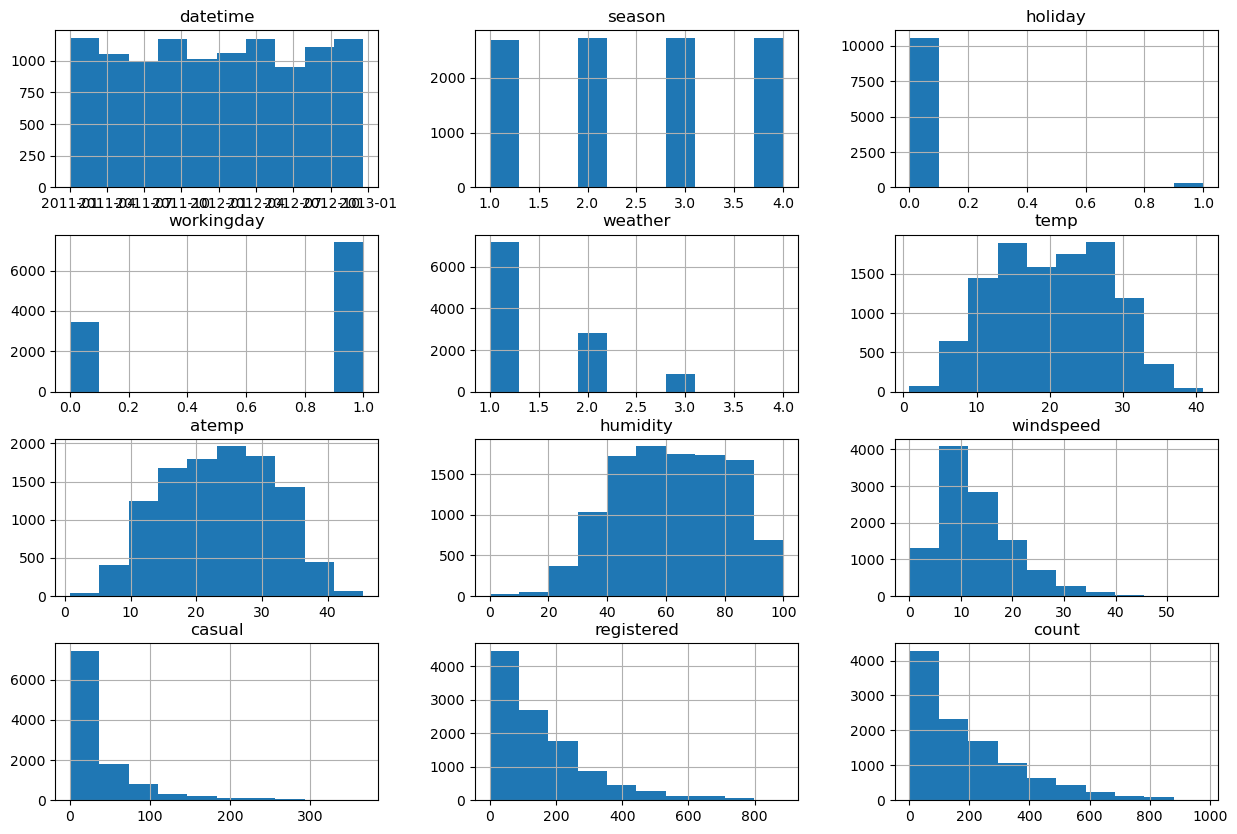

In [41]:
# Create a histogram of all features to show the distribution of each one relative to the data. This is part of the exploritory data analysis
train.hist(figsize = (15,10));

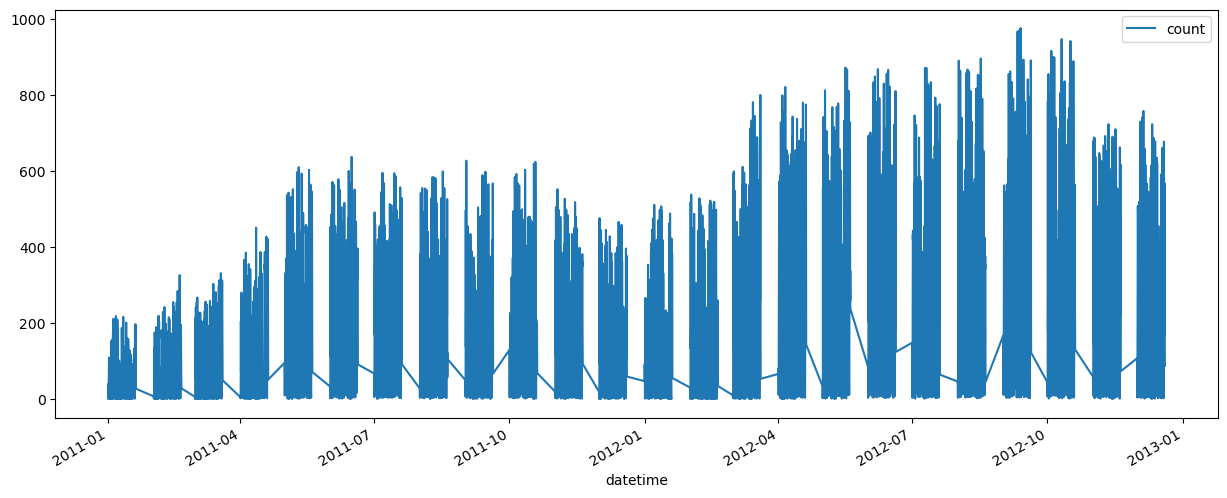

In [42]:
# time series plot for demand
train.plot(x='datetime', y='count', figsize=(15, 6));

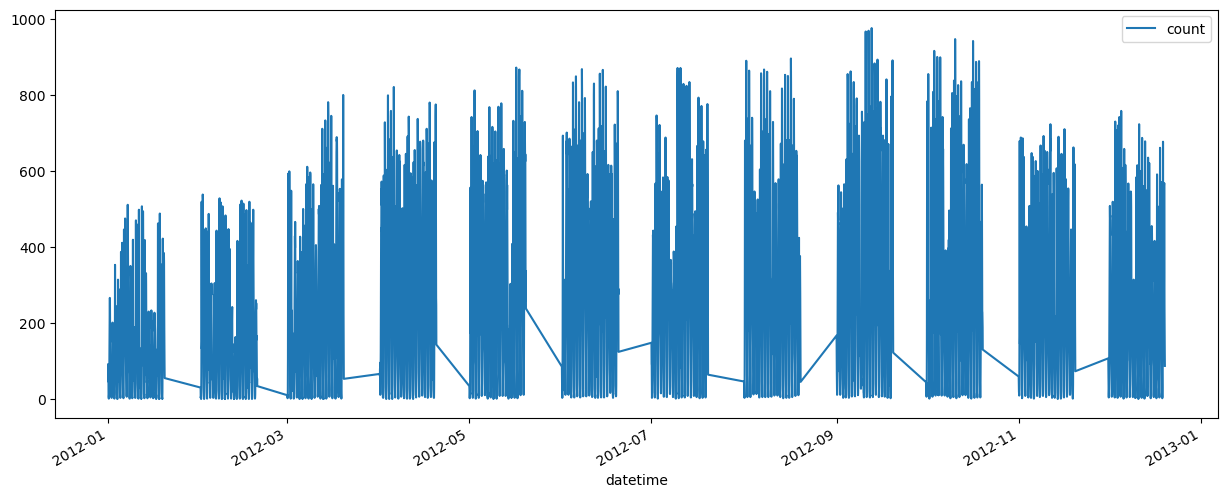

In [43]:
# time series plot for demand for a particular year.
train.loc[train.datetime.dt.year == 2012].plot(x='datetime', y='count', figsize=(15, 6));

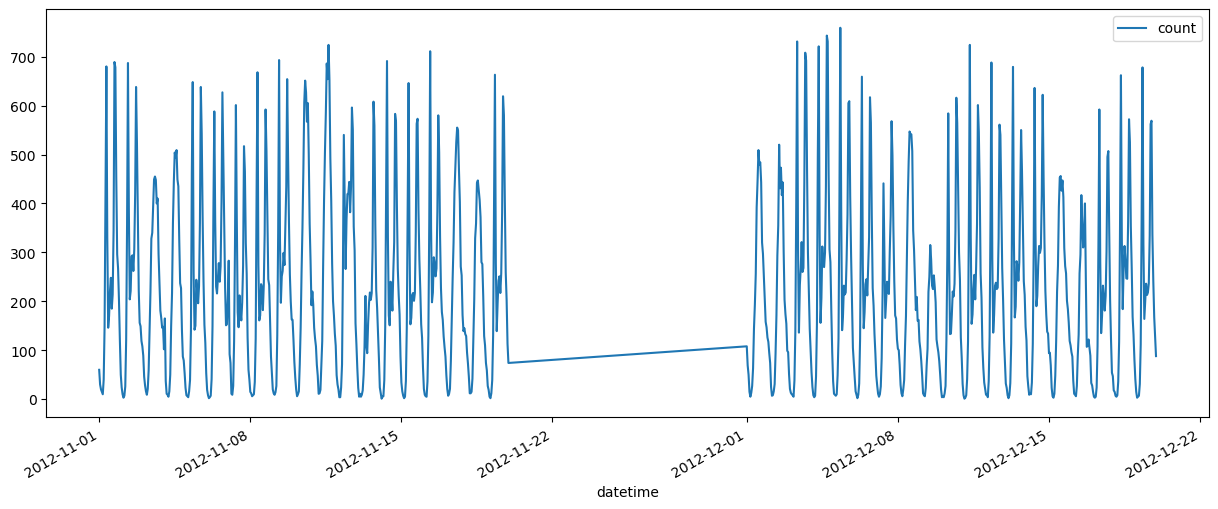

In [45]:
# time series plot for the two consecutive months
train.loc[(train.datetime.dt.year == 2012) & ((train.datetime.dt.month == 11) | (train.datetime.dt.month == 12))].plot(x='datetime', y='count', figsize=(15, 6));

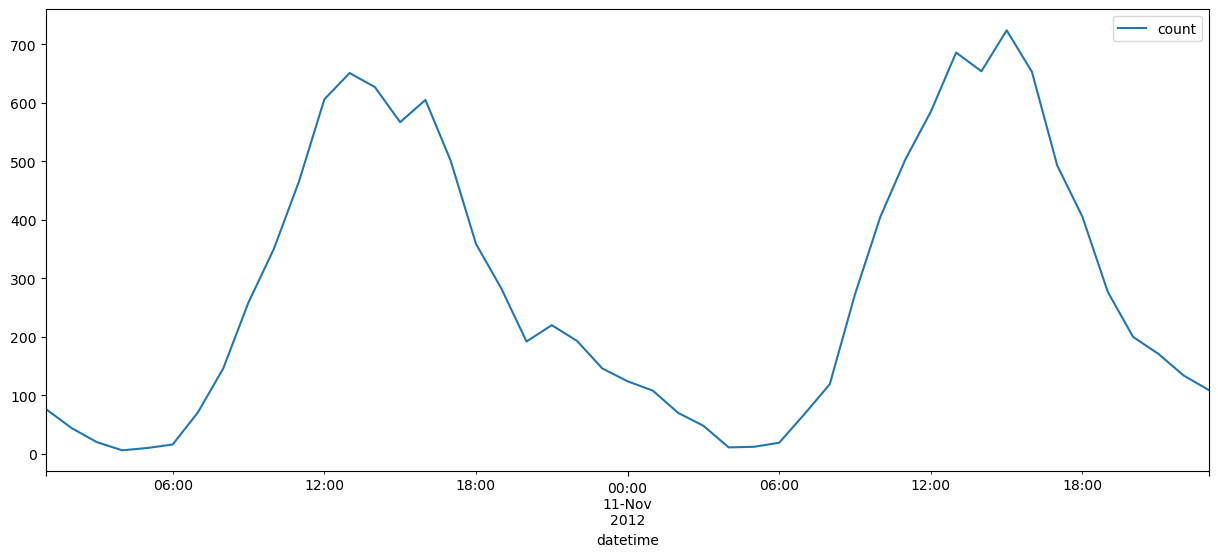

In [46]:
# time series plot for a particular weekend
train.loc[(train.datetime > '2012-11-10') & (train.datetime < '2012-11-12')].plot(x='datetime', y='count', figsize=(15, 6));

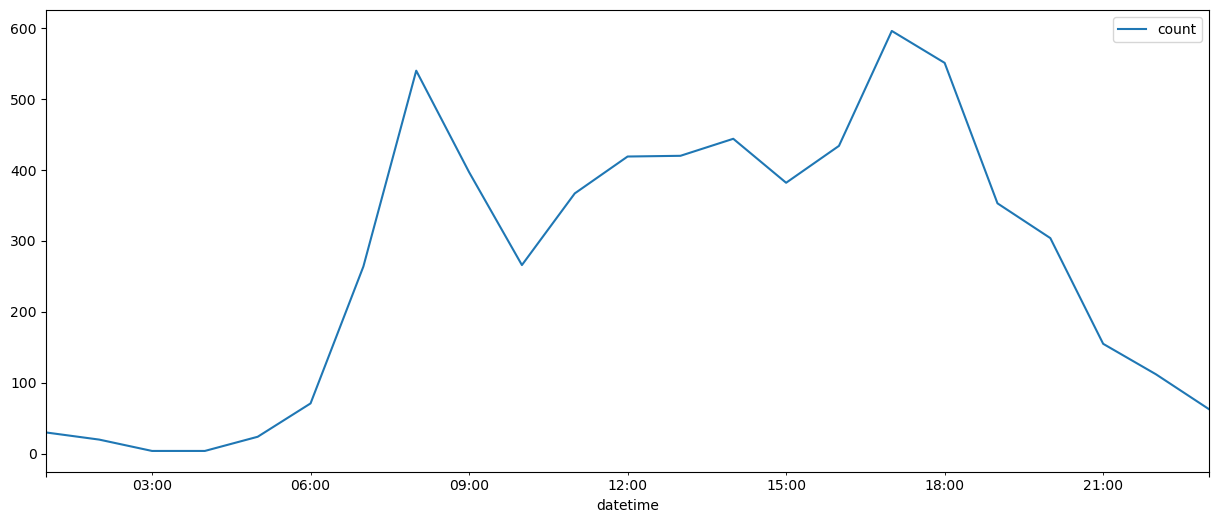

In [47]:
# time series plot for a particular weekday: Monday
train.loc[(train.datetime > '2012-11-12') & (train.datetime < '2012-11-13')].plot(x='datetime', y='count', figsize=(15, 6));

In [48]:
# Seperate hour, day, month from datetime
train['hour'] = train['datetime'].dt.hour
train['day'] = train['datetime'].dt.day
train['month'] = train['datetime'].dt.month
test['hour'] = test['datetime'].dt.hour
test['day'] = test['datetime'].dt.day
test['month'] = test['datetime'].dt.month

In [50]:
# create a new feature :  time_of_day
def get_time_of_day(x):
    if (x > 4) and (x <= 8):
        return 0 # Early Morning
    elif (x > 8) and (x <= 12 ):
        return 1 # Morning
    elif (x > 12) and (x <= 16):
        return 2 # Noon
    elif (x > 16) and (x <= 20) :
        return 3 # Evening
    elif (x > 20) and (x <= 24):
        return 4 # Night
    elif (x <= 4):
        return 5 # Late Night


train['time_of_day'] = train['hour'].apply(get_time_of_day)
test['time_of_day'] = test['hour'].apply(get_time_of_day)

In [51]:
# create a new feature: temp_category
def get_temp_category(x):
    if x <= 10:
        return 0 # low temp
    elif (x > 10) and (x <= 25 ):
        return 1 # mild temp
    elif (x > 25):
        return 2 # hot temp


train['temp_category'] = train['temp'].apply(get_temp_category)
test['temp_category'] = test['temp'].apply(get_temp_category)

In [52]:
# create a new feature: wind_category
def get_wind_category(x):
    if x <= 15:
        return 0 # normal wind
    elif (x > 10):
        return 1 # high wind


train['wind_category'] = train['windspeed'].apply(get_wind_category)
test['wind_category'] = test['windspeed'].apply(get_wind_category)

In [53]:
# create a new feature: humid_category
def get_humid_category(x):
    if x <= 30:
        return 0 # low humidity
    elif (x > 30) and (x <= 50 ):
        return 1 # normal humidity
    elif (x > 50):
        return 2 # high humidity

train['humid_category'] = train['humidity'].apply(get_humid_category)
test['humid_category'] = test['humidity'].apply(get_humid_category)

In [54]:
# create a new feature: atemp_category
def get_atemp_category(x):
    if x <= 10:
        return 0 # low temp
    elif (x > 10) and (x <= 25 ):
        return 1 # mild temp
    elif (x > 25):
        return 2 # hot temp


train['atemp_category'] = train['atemp'].apply(get_atemp_category)
test['atemp_category'] = test['atemp'].apply(get_atemp_category)

In [55]:
train.drop(['datetime', 'temp', 'windspeed', 'humidity', 'atemp'], axis=1, inplace=True)
test.drop(['datetime', 'temp', 'windspeed', 'humidity', 'atemp'], axis=1, inplace=True)

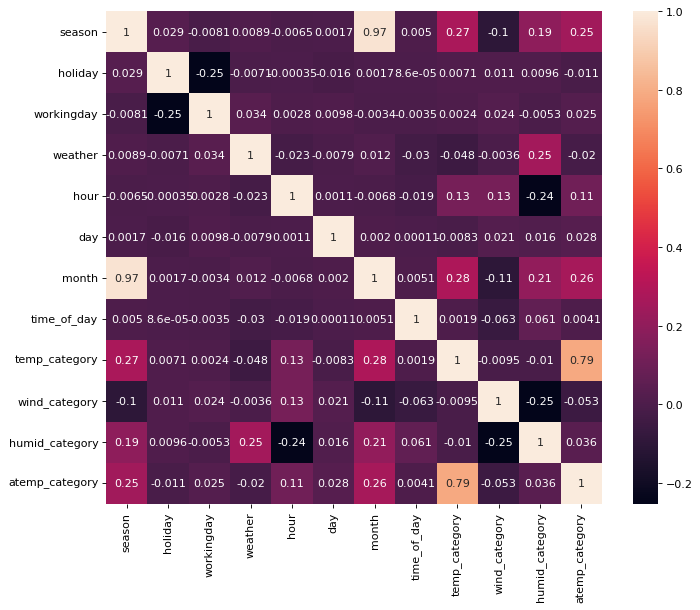

In [56]:
import seaborn as sn
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8), dpi=80)

sn.heatmap(train.drop(['count', 'registered','casual'], axis=1).corr(), annot=True)
plt.show()

In [57]:
# removing season column as it's having very high correlation with month
train.drop(['season'], axis=1, inplace=True)
test.drop(['season'], axis=1, inplace=True)

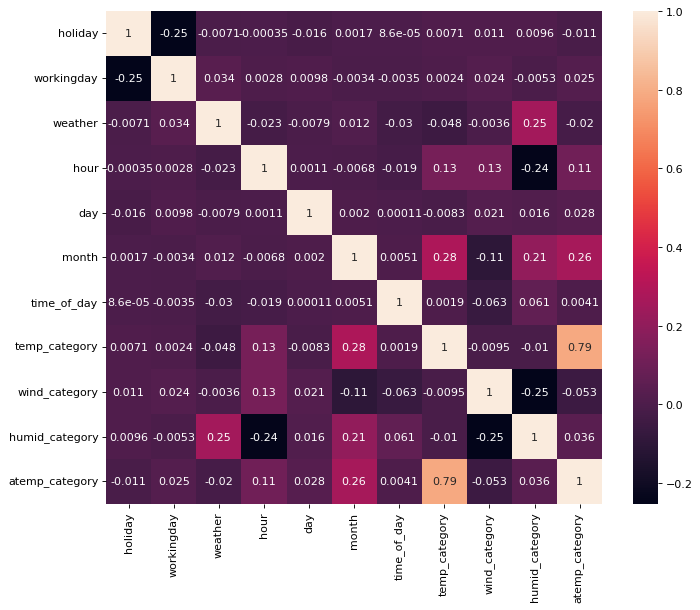

In [58]:
plt.figure(figsize=(10, 8), dpi=80)

sn.heatmap(train.drop(['count', 'registered','casual'], axis=1).corr(), annot=True)
plt.show()

## Make category types for these so models know they are not just numbers
* AutoGluon originally sees these as ints, but in reality they are int representations of a category.
* Setting the dtype to category will classify these as categories in AutoGluon.

In [59]:
train['hour'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int32)

In [63]:
train["weather"] = train["weather"].astype('category')
train["time_of_day"] = train["time_of_day"].astype('category')
train["temp_category"] = train["temp_category"].astype('category')
train["wind_category"] = train["wind_category"].astype('category')
train["humid_category"] = train["humid_category"].astype('category')
train["holiday"] = train["holiday"].astype('category')
train["workingday"] = train["workingday"].astype('category')
train["hour"] = train["hour"].astype('category')
train["month"] = train["month"].astype('category')

test["weather"] = test["weather"].astype('category')
test["time_of_day"] = test["time_of_day"].astype('category')
test["temp_category"] = test["temp_category"].astype('category')
test["wind_category"] = test["wind_category"].astype('category')
test["humid_category"] = test["humid_category"].astype('category')
test["holiday"] = test["holiday"].astype('category')
test["workingday"] = test["workingday"].astype('category')
test["hour"] = test["hour"].astype('category')
test["month"] = test["month"].astype('category')

In [64]:
# View are new feature
train.head()

,holiday,workingday,weather,casual,registered,count,hour,day,month,time_of_day,temp_category,wind_category,humid_category,atemp_category
0,0,0,1,3,13,16,0,1,1,5,0,0,2,1
1,0,0,1,8,32,40,1,1,1,5,0,0,2,1
2,0,0,1,5,27,32,2,1,1,5,0,0,2,1
3,0,0,1,3,10,13,3,1,1,5,0,0,2,1
4,0,0,1,0,1,1,4,1,1,5,0,0,2,1


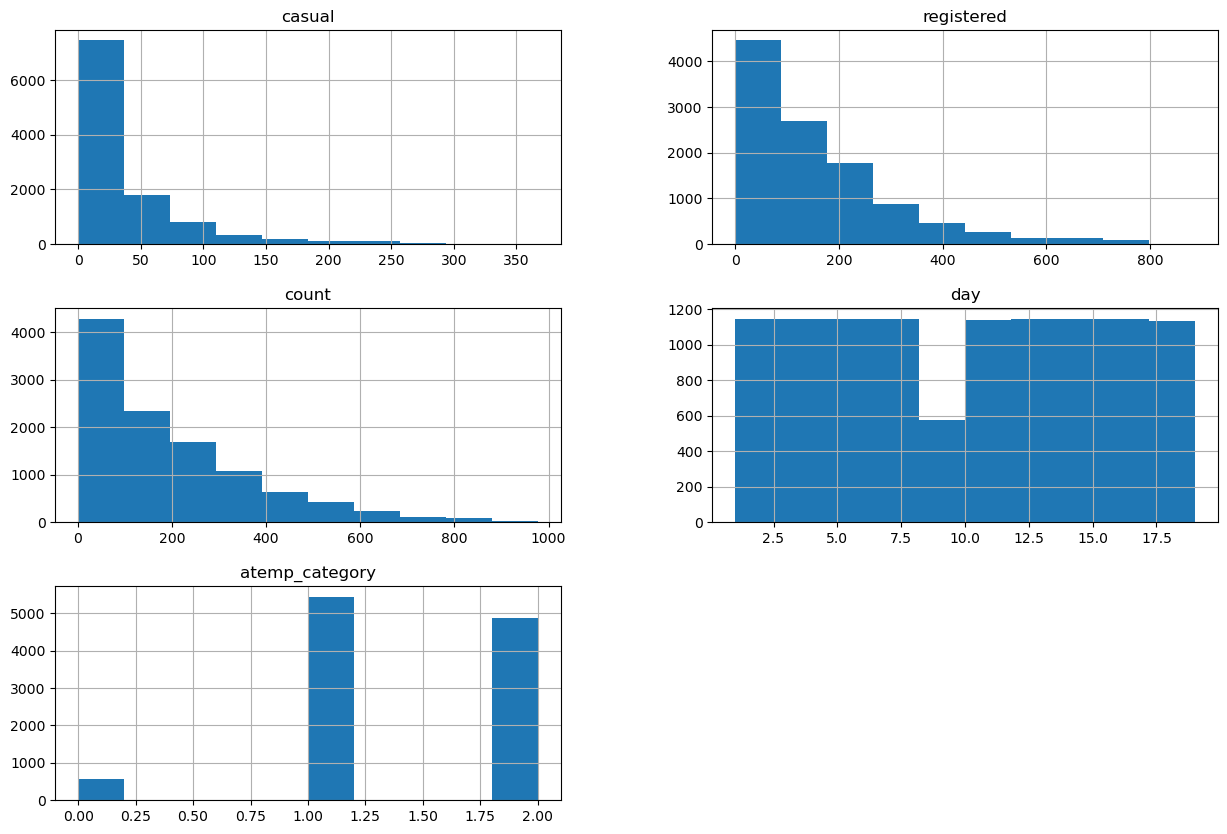

In [65]:
# View histogram of all features again now with the hour feature
train.hist(figsize = (15,10));

## Step 5: Rerun the model with the same settings as before, just with more features

In [66]:
predictor_new_features = TabularPredictor(
    label="count", 
    verbosity=0,
    eval_metric = 'root_mean_squared_error', 
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600, 
    presets="best_quality"
)

In [67]:
predictor_new_features.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                     model   score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0      WeightedEnsemble_L3  -61.366126  root_mean_squared_error      13.498187  350.003529                0.000890           0.053412            3       True         13
1          LightGBM_BAG_L2  -62.026605  root_mean_squared_error      12.712780  313.997654                0.231802          26.827316            2       True         11
2   RandomForestMSE_BAG_L2  -62.187213  root_mean_squared_error      13.265496  323.122801                0.784518          35.952462            2       True         12
3      WeightedEnsemble_L2  -62.584943  root_mean_squared_error      11.145280  243.763606                0.001615           0.050538            2       True          9
4          LightGBM_BAG_L1  -62.821455  root_mean_squared_error       2.748403   33.381237   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'KNeighborsUnif_BAG_L1': 'StackerEnsembleModel_KNN',
  'KNeighborsDist_BAG_L1': 'StackerEnsembleModel_KNN',
  'LightGBMXT_BAG_L1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1': 'StackerEnsembleModel_CatBoost',
  'ExtraTreesMSE_BAG_L1': 'StackerEnsembleModel_XT',
  'NeuralNetFastAI_BAG_L1': 'StackerEnsembleModel_NNFastAiTabular',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBMXT_BAG_L2': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2': 'StackerEnsembleModel_LGB',
  'RandomForestMSE_BAG_L2': 'StackerEnsembleModel_RF',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'KNeighborsUnif_BAG_L1': -201.39398754905193,
  'KNeighborsDist_BAG_L1': -201.39385023214737,
  'LightGBMXT_BAG_L1': -65.98549025838962,
  'LightGBM_BAG_L1': -62.82145502717451,
  'RandomForestMSE_BAG_L1': -71.57652152510794,
  'CatBoost_BAG_L1': -69.8859105145345,


In [68]:
# Get predictions
predictions = predictor_new_features.predict(test)

In [69]:
# Remember to set all negative values to zero
predictions = predictions.clip(lower=0)

In [70]:
# Same submitting predictions
submission_new_features = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_new_features["count"] = predictions
# Round count column values
submission_new_features['count'] = submission_new_features['count'].apply(lambda x: round(x))
submission_new_features.to_csv("submission_new_features.csv", index=False)

In [71]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_features.csv -m "new features"

100%|█████████████████████████████████████████| 149k/149k [00:00<00:00, 535kB/s]
Successfully submitted to Bike Sharing Demand

In [72]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description           status    publicScore  privateScore  
---------------------------  -------------------  --------------------  --------  -----------  ------------  
submission_new_features.csv  2024-04-28 05:25:33  new features          complete  0.5983       0.5983        
submission.csv               2024-04-28 04:55:28  first raw submission  complete  1.80757      1.80757       


#### New Score of 0.5983

## Step 6: Hyper parameter optimization
* There are many options for hyper parameter optimization.
* Options are to change the AutoGluon higher level parameters or the individual model hyperparameters.
* The hyperparameters of the models themselves that are in AutoGluon. Those need the `hyperparameter` and `hyperparameter_tune_kwargs` arguments.

In [82]:
import autogluon as ag

nn_options = {
    'num_epochs': 10,
    'learning_rate': ag.common.space.Real(1e-4, 1e-2, default=5e-4, log=True),
    'activation': ag.common.space.Categorical('relu', 'softrelu', 'tanh'),
    'layers': ag.common.space.Categorical([100],[1000],[200,100],[300,200,100]),
    'dropout_prob': ag.common.space.Real(0.0, 0.5, default=0.1),
}

gbm_options = {
    'num_boost_round': 100,
    'num_leaves': ag.common.space.Int(lower=26, upper=66, default=36)
}

hyperparameters = {
    'GBM': gbm_options,
    'CAT': {'iterations': 10000},
    'RF': {'n_estimators': 300},
    'XT': {'n_estimators': 300}
    # 'NN': nn_options
} 

hyperparameter_tune_kwargs = { 
    'scheduler': 'local',
    'searcher': 'auto' 
}

predictor_new_hpo = TabularPredictor(
    label="count", 
    verbosity=0,
    eval_metric='root_mean_squared_error', 
    learner_kwargs={"ignored_columns": ["casual", "registered"]}
).fit(
    train_data=train,
    time_limit=600, 
    presets="best_quality",
    hyperparameters=hyperparameters,
    hyperparameter_tune_kwargs=hyperparameter_tune_kwargs
)

In [83]:
predictor_new_hpo.fit_summary()

*** Summary of fit() ***
Estimated performance of each model:
                  model  score_val              eval_metric  pred_time_val    fit_time  pred_time_val_marginal  fit_time_marginal  stack_level  can_infer  fit_order
0   WeightedEnsemble_L3 -65.561332  root_mean_squared_error       0.002190  170.913244                0.000947           0.077933            3       True         12
1     ExtraTrees_BAG_L2 -65.627991  root_mean_squared_error       0.001091  144.505696                0.000250          11.629902            2       True         11
2    LightGBM_BAG_L2/T2 -67.234413  root_mean_squared_error       0.000993  159.205409                0.000152          26.329615            2       True          8
3   RandomForest_BAG_L2 -67.348161  root_mean_squared_error       0.001065  161.568778                0.000225          28.692984            2       True          9
4    CatBoost_BAG_L2/T1 -67.429779  root_mean_squared_error       0.000994  201.788032                0.000153   

/opt/conda/lib/python3.10/site-packages/autogluon/core/utils/plots.py:169: UserWarning: AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"
  warnings.warn('AutoGluon summary plots cannot be created because bokeh is not installed. To see plots, please do: "pip install bokeh==2.0.1"')


{'model_types': {'LightGBM_BAG_L1/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L1/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L1': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L1/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L1': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L2': 'WeightedEnsembleModel',
  'LightGBM_BAG_L2/T1': 'StackerEnsembleModel_LGB',
  'LightGBM_BAG_L2/T2': 'StackerEnsembleModel_LGB',
  'RandomForest_BAG_L2': 'StackerEnsembleModel_RF',
  'CatBoost_BAG_L2/T1': 'StackerEnsembleModel_CatBoost',
  'ExtraTrees_BAG_L2': 'StackerEnsembleModel_XT',
  'WeightedEnsemble_L3': 'WeightedEnsembleModel'},
 'model_performance': {'LightGBM_BAG_L1/T1': -73.16703003894227,
  'LightGBM_BAG_L1/T2': -70.96437061772194,
  'RandomForest_BAG_L1': -71.57652152510794,
  'CatBoost_BAG_L1/T1': -73.24708713343604,
  'ExtraTrees_BAG_L1': -73.8304068435874,
  'WeightedEnsemble_L2': -68.4568374187714,
  'LightGBM_BAG_L2/T1': -67.45883851768377,
  'LightGBM_BAG_L2/T2': -67.23

In [84]:
predictions = predictor_new_hpo.predict(test)

In [85]:
# Remember to set all negative values to zero
predictions = predictions.clip(lower=0)

In [86]:
# Same submitting predictions
submission_hpo = pd.read_csv('sampleSubmission.csv', parse_dates=['datetime'])
submission_hpo["count"] = predictions
# Round count column values
submission_hpo['count'] = submission_hpo['count'].apply(lambda x: round(x))
submission_hpo.to_csv("submission_new_hpo.csv", index=False)

In [87]:
!kaggle competitions submit -c bike-sharing-demand -f submission_new_hpo.csv -m "new features with hyperparameters"

100%|█████████████████████████████████████████| 150k/150k [00:00<00:00, 517kB/s]
Successfully submitted to Bike Sharing Demand

In [88]:
!kaggle competitions submissions -c bike-sharing-demand | tail -n +1 | head -n 6

fileName                     date                 description                        status    publicScore  privateScore  
---------------------------  -------------------  ---------------------------------  --------  -----------  ------------  
submission_new_hpo.csv       2024-04-28 06:04:11  new features with hyperparameters  complete  0.54894      0.54894       
submission_new_features.csv  2024-04-28 05:25:33  new features                       complete  0.5983       0.5983        
submission.csv               2024-04-28 04:55:28  first raw submission               complete  1.80757      1.80757       


#### New Score of 0.54894 

## Step 7: Write a Report
### Refer to the markdown file for the full report
### Creating plots and table for report

In [ ]:
# Taking the top model score from each training run and creating a line plot to show improvement
# You can create these in the notebook and save them to PNG or use some other tool (e.g. google sheets, excel)
fig = pd.DataFrame(
    {
        "model": ["initial", "add_features", "hpo"],
        "score": [?, ?, ?]
    }
).plot(x="model", y="score", figsize=(8, 6)).get_figure()
fig.savefig('model_train_score.png')

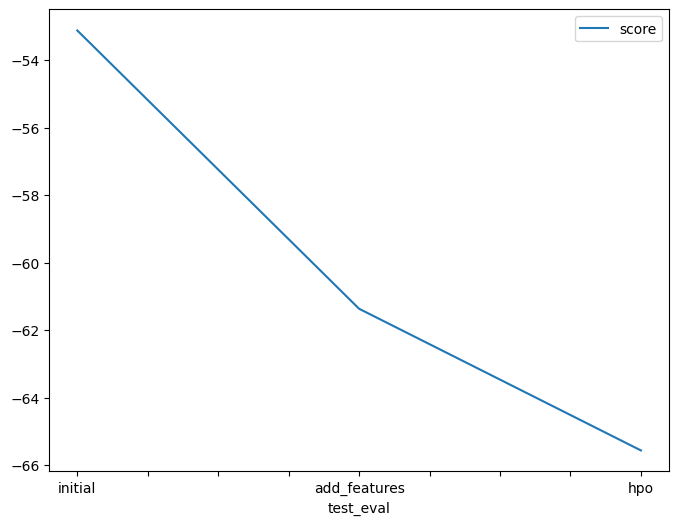

In [94]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [-53.124950, -61.366126, -65.561332]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_test_score.png')

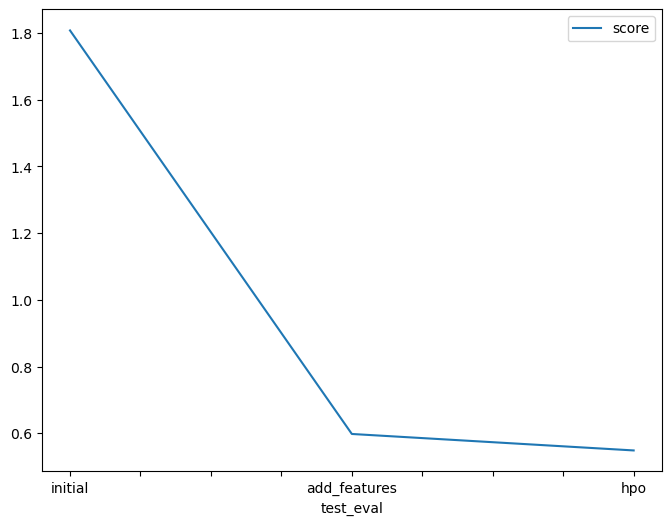

In [95]:
# Take the 3 kaggle scores and creating a line plot to show improvement
fig = pd.DataFrame(
    {
        "test_eval": ["initial", "add_features", "hpo"],
        "score": [1.80757, 0.5983, 0.54894]
    }
).plot(x="test_eval", y="score", figsize=(8, 6)).get_figure()
fig.savefig('img/model_train_score.png')

### Hyperparameter table

In [96]:
# The 3 hyperparameters we tuned with the kaggle score as the result
pd.set_option('display.max_colwidth', 60)
pd.DataFrame({
    "model": ["initial", "add_features", "hpo"],
    "hpo1": ["default", "default", "'CAT': {'iterations': 10000},'RF': {'n_estimators': 300},'XT': {'n_estimators': 300}"],
    "hpo2": ["default", "default", "GB: num_boost_round=100, num_leaves(lower=26, upper=66, default=36)"],
    "hpo3": ["default", "default", "scheduler: local, searcher: auto"],
    "score": [1.80757, 0.5983, 0.54894]
})

,model,hpo1,hpo2,hpo3,score
0,initial,default,default,default,1.80757
1,add_features,default,default,default,0.59830
2,hpo,"'CAT': {'iterations': 10000},'RF': {'n_estimators': 300}...","GB: num_boost_round=100, num_leaves(lower=26, upper=66, ...","scheduler: local, searcher: auto",0.54894
